In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Rescaling, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
os.listdir()

['.ipynb_checkpoints', 'model training gender.ipynb']

In [3]:
data = r'D:\Projects\Artificial Intelligence\Image Data\Gender Classification using Opencv\data\Man_Woman'

In [4]:
man = np.array(os.listdir(data+'\man\\'))
woman = np.array(os.listdir(data+'\woman\\'))

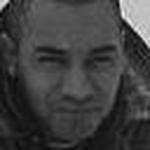

In [5]:
img = load_img(data + '\man\\' + man[0])
img

In [6]:
img_samp = img_to_array(img)
img_samp[:4]

array([[[187., 187., 187.],
        [184., 184., 184.],
        [181., 181., 181.],
        ...,
        [192., 192., 192.],
        [194., 194., 194.],
        [195., 195., 195.]],

       [[188., 188., 188.],
        [187., 187., 187.],
        [186., 186., 186.],
        ...,
        [193., 193., 193.],
        [194., 194., 194.],
        [196., 196., 196.]],

       [[195., 195., 195.],
        [198., 198., 198.],
        [199., 199., 199.],
        ...,
        [193., 193., 193.],
        [194., 194., 194.],
        [195., 195., 195.]],

       [[200., 200., 200.],
        [207., 207., 207.],
        [211., 211., 211.],
        ...,
        [191., 191., 191.],
        [192., 192., 192.],
        [193., 193., 193.]]], dtype=float32)

In [7]:
img_samp.shape

(150, 150, 3)

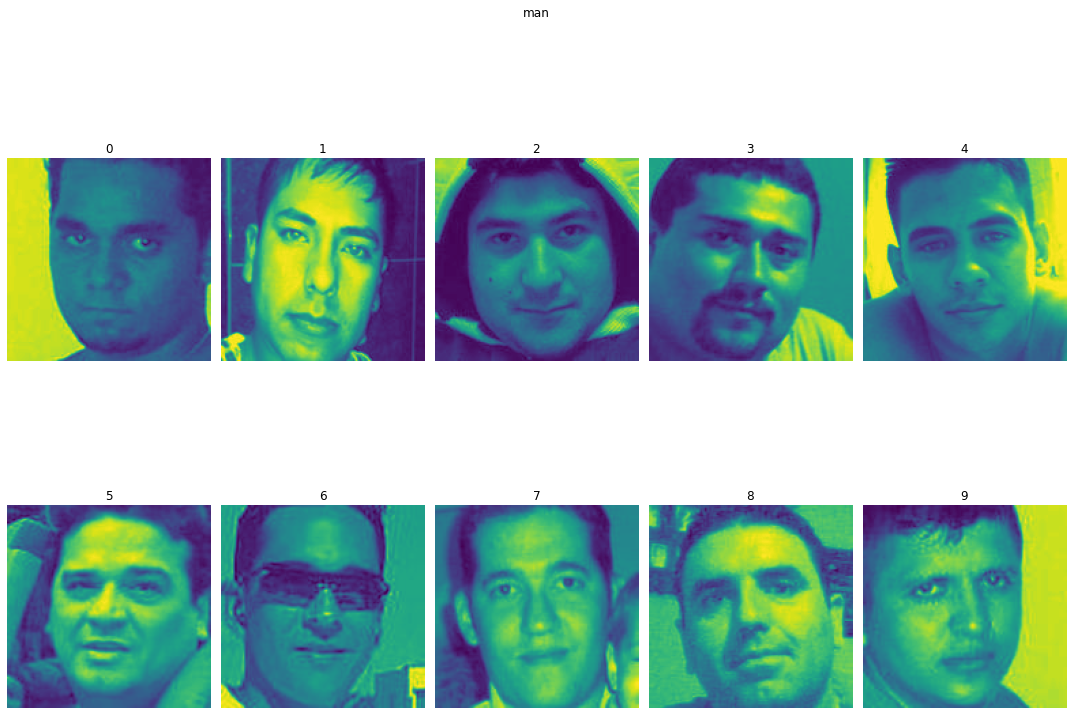

In [8]:
fig, axes = plt.subplots(2,5, figsize=(15,12))
axes = axes.flatten()
plt.suptitle('man')

i= 0
for x in np.random.choice(man,10):
    fname = data + "\man\\" + x
    img = plt.imread(fname)
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(i)
    i+= 1
    
plt.tight_layout()

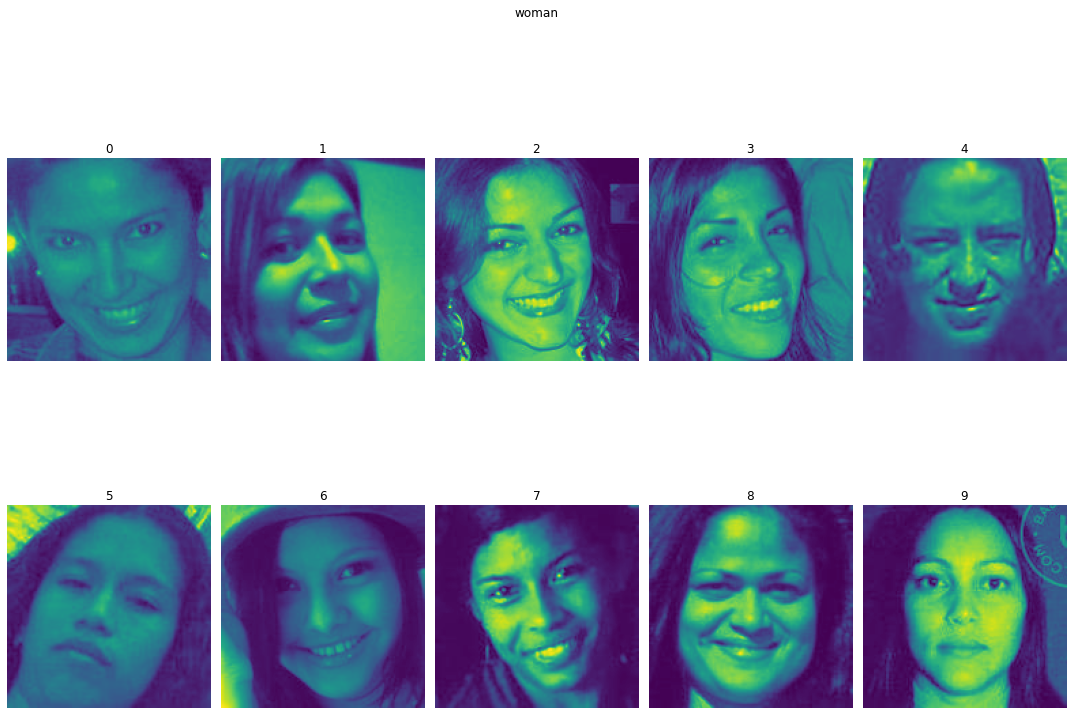

In [9]:
fig, axes = plt.subplots(2,5, figsize=(15,12))
axes = axes.flatten()
plt.suptitle('woman')

i= 0
for x in np.random.choice(woman,10):
    fname = data + "\woman\\" + x
    img = plt.imread(fname)
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(i)
    i+= 1
    
plt.tight_layout()

In [10]:
len(man)

2335

In [11]:
len(woman)

1003

In [12]:
for x in man:
    fp = data + '\man\\' + x
    print(fp)

D:\Projects\Artificial Intelligence\Image Data\Gender Classification using Opencv\data\Man_Woman\man\001963175c5b494fb1413f0e0d7a5f3c_.jpg
D:\Projects\Artificial Intelligence\Image Data\Gender Classification using Opencv\data\Man_Woman\man\001bd9c52a9f4a27b7cfa1d72628f58b_.jpg
D:\Projects\Artificial Intelligence\Image Data\Gender Classification using Opencv\data\Man_Woman\man\001d5cd7991a4467af9e965b9b3f3dac_.jpg
D:\Projects\Artificial Intelligence\Image Data\Gender Classification using Opencv\data\Man_Woman\man\0025f304a9c44f069043f15a9a9881ae_.jpg
D:\Projects\Artificial Intelligence\Image Data\Gender Classification using Opencv\data\Man_Woman\man\004573092f9849e6937b9c72c47c0254_.jpg
D:\Projects\Artificial Intelligence\Image Data\Gender Classification using Opencv\data\Man_Woman\man\00695cb041784743aa70ba6260925e18_.jpg
D:\Projects\Artificial Intelligence\Image Data\Gender Classification using Opencv\data\Man_Woman\man\006dfe24a72d4dceaa099fe49bba544c_.jpg
D:\Projects\Artificial Inte

D:\Projects\Artificial Intelligence\Image Data\Gender Classification using Opencv\data\Man_Woman\man\9b64f125e8df4bdc952bbfcc4237a812_.jpg
D:\Projects\Artificial Intelligence\Image Data\Gender Classification using Opencv\data\Man_Woman\man\9b7c49b0e04c4a3180e22554ad3bc023_.jpg
D:\Projects\Artificial Intelligence\Image Data\Gender Classification using Opencv\data\Man_Woman\man\9b89111fb28a4e248ed20cc568de59c0_.jpg
D:\Projects\Artificial Intelligence\Image Data\Gender Classification using Opencv\data\Man_Woman\man\9b94a4f2a1d14a718a4fcf9a6e3046b1_.jpg
D:\Projects\Artificial Intelligence\Image Data\Gender Classification using Opencv\data\Man_Woman\man\9ba5e47146b24a32bc25edad84550224_.jpg
D:\Projects\Artificial Intelligence\Image Data\Gender Classification using Opencv\data\Man_Woman\man\9baa0b81ffda416e82adcedb11e09d9b_.jpg
D:\Projects\Artificial Intelligence\Image Data\Gender Classification using Opencv\data\Man_Woman\man\9bb0f909434f4ee385df8d764f765658_.jpg
D:\Projects\Artificial Inte

In [13]:
man

array(['001963175c5b494fb1413f0e0d7a5f3c_.jpg',
       '001bd9c52a9f4a27b7cfa1d72628f58b_.jpg',
       '001d5cd7991a4467af9e965b9b3f3dac_.jpg', ...,
       'ff92bb97835b4d648f352c8eb7b4ff28_.jpg',
       'ff9757f3b6b440219107bee04c6feed0_.jpg',
       'ffe2103c124f4555bab09f871f8b805f_.jpg'], dtype='<U37')

In [14]:
data

'D:\\Projects\\Artificial Intelligence\\Image Data\\Gender Classification using Opencv\\data\\Man_Woman'

In [16]:
IMAGE_SIZE = (100, 100)
IMAGE_SHAPE = (100, 100, 3)
generator = ImageDataGenerator(rescale=1./255)
generator

In [17]:
train = generator.flow_from_directory(data, target_size= IMAGE_SIZE,class_mode='binary')
train[0]

Found 3338 images belonging to 2 classes.


(array([[[[0.3137255 , 0.3137255 , 0.3137255 ],
          [0.31764707, 0.31764707, 0.31764707],
          [0.32156864, 0.32156864, 0.32156864],
          ...,
          [0.2784314 , 0.2784314 , 0.2784314 ],
          [0.2784314 , 0.2784314 , 0.2784314 ],
          [0.2784314 , 0.2784314 , 0.2784314 ]],
 
         [[0.3254902 , 0.3254902 , 0.3254902 ],
          [0.3254902 , 0.3254902 , 0.3254902 ],
          [0.3254902 , 0.3254902 , 0.3254902 ],
          ...,
          [0.27450982, 0.27450982, 0.27450982],
          [0.27450982, 0.27450982, 0.27450982],
          [0.27450982, 0.27450982, 0.27450982]],
 
         [[0.33333334, 0.33333334, 0.33333334],
          [0.33333334, 0.33333334, 0.33333334],
          [0.32941177, 0.32941177, 0.32941177],
          ...,
          [0.2784314 , 0.2784314 , 0.2784314 ],
          [0.2784314 , 0.2784314 , 0.2784314 ],
          [0.2784314 , 0.2784314 , 0.2784314 ]],
 
         ...,
 
         [[0.27058825, 0.27058825, 0.27058825],
          [0.26274

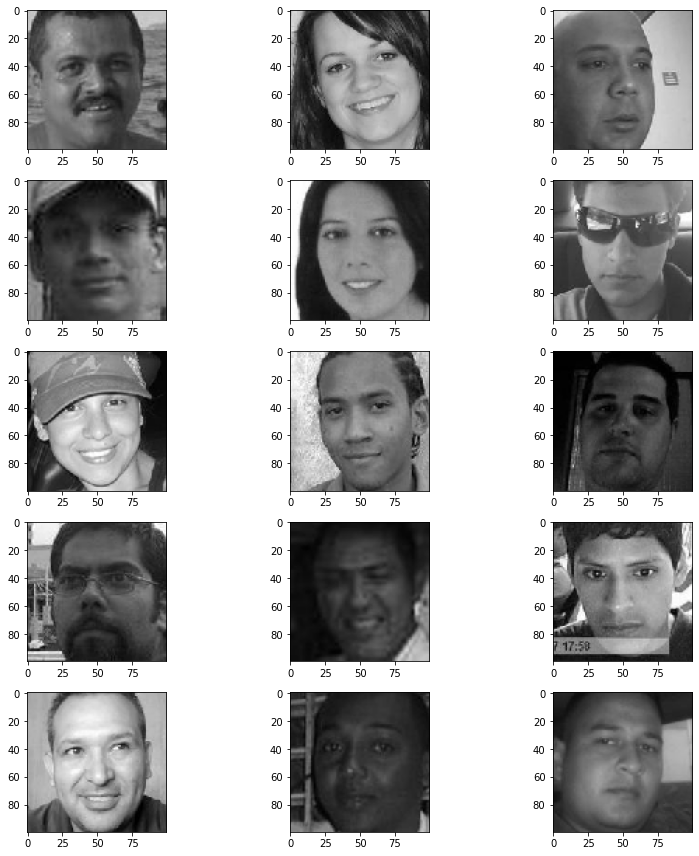

In [18]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [29]:
def createModel(input_shape):
    model = Sequential()
    
    model.add(Conv2D(28, (3, 3), activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    model.add(Conv2D(42, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    
    model.add(Flatten())
    model.add(Dense(48, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    model.add(Dense(1, activation='sigmoid')) 

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [30]:
model = createModel(IMAGE_SHAPE)

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 28)        784       
                                                                 
 batch_normalization_3 (Batc  (None, 98, 98, 28)       112       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 28)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 49, 49, 28)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 47, 42)        10626     
                                                                 
 batch_normalization_4 (Batc  (None, 47, 47, 42)      

In [32]:
!pip install visualkeras

In [33]:
import visualkeras
from tensorflow.keras.utils import plot_model

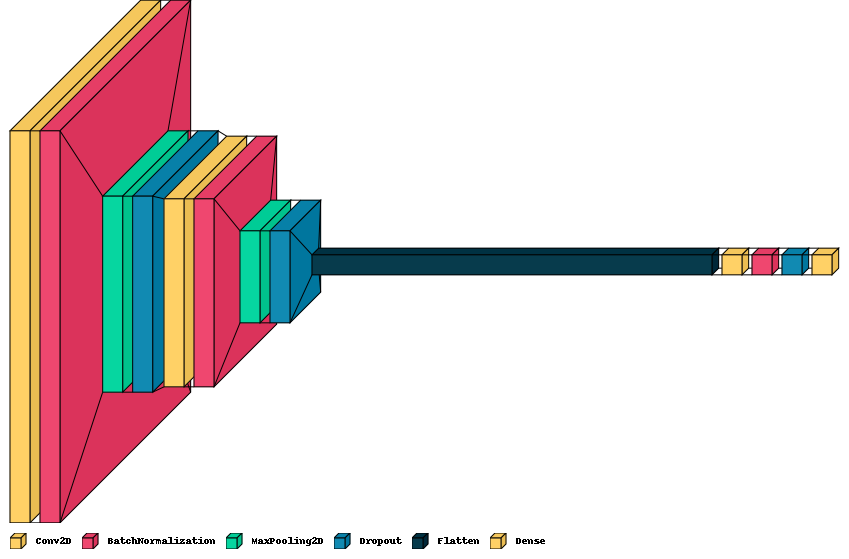

In [34]:
visualkeras.layered_view(model, legend=True)

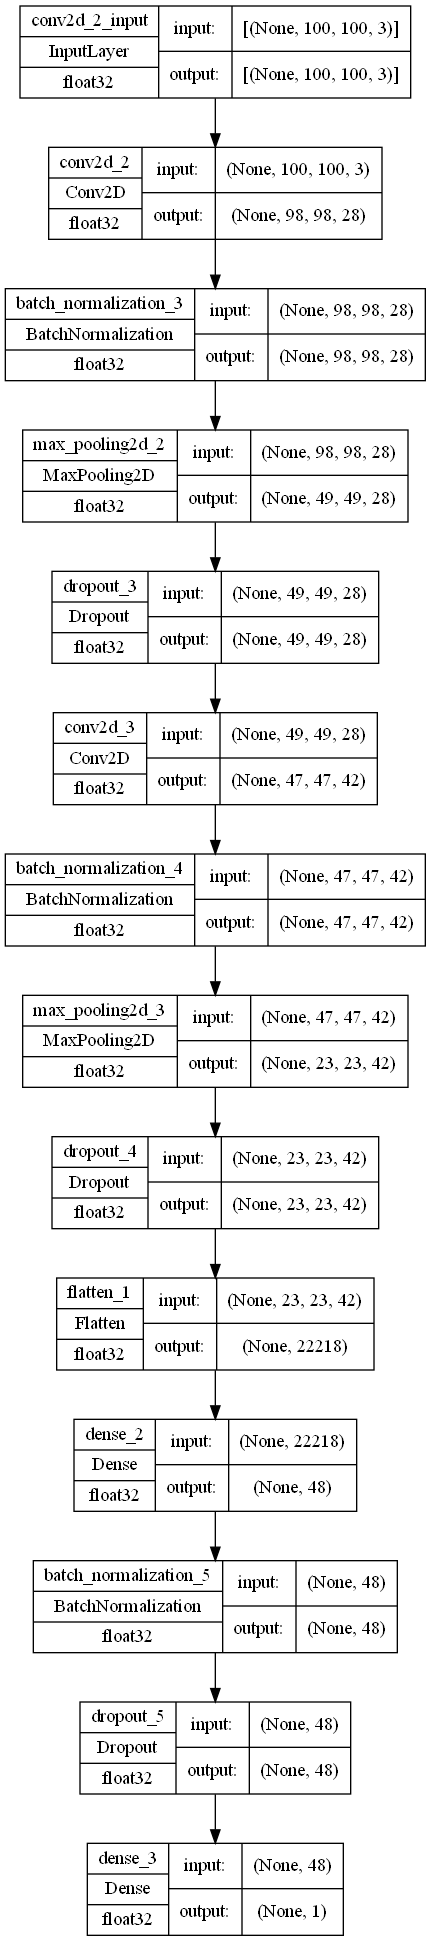

In [35]:
plot_model(model, show_shapes=True, show_dtype=True)

In [36]:
model.fit(train, epochs=50, batch_size=32)

Epoch 1/50
105/105 [==============================] - 61s 571ms/step - loss: 0.5848 - accuracy: 0.7190
Epoch 2/50
105/105 [==============================] - 41s 393ms/step - loss: 0.4317 - accuracy: 0.8134
Epoch 3/50
105/105 [==============================] - 38s 363ms/step - loss: 0.3579 - accuracy: 0.8496
Epoch 4/50
105/105 [==============================] - 34s 323ms/step - loss: 0.3000 - accuracy: 0.8808
Epoch 5/50
105/105 [==============================] - 33s 310ms/step - loss: 0.2707 - accuracy: 0.8886
Epoch 6/50
105/105 [==============================] - 33s 311ms/step - loss: 0.2245 - accuracy: 0.9080
Epoch 7/50
105/105 [==============================] - 33s 315ms/step - loss: 0.2305 - accuracy: 0.9065
Epoch 8/50
105/105 [==============================] - 34s 326ms/step - loss: 0.1990 - accuracy: 0.9152
Epoch 9/50
105/105 [==============================] - 32s 307ms/step - loss: 0.1710 - accuracy: 0.9332
Epoch 10/50
105/105 [==============================] - 33s 316ms/step - l

KeyboardInterrupt: 

In [37]:
model_fol = r'D:\Projects\Artificial Intelligence\Image Data\Gender Classification using Opencv\model'
model.save(model_fol + '/model_samp_bw.h5')

In [38]:
data

'D:\\Projects\\Artificial Intelligence\\Image Data\\Gender Classification using Opencv\\data\\Man_Woman'

In [39]:
woman

array(['0085c23544064182ba253c516b842d21_.jpg',
       '00e06f1543c147e494069c362137ed85_.jpg',
       '013231b08bcf42e7a0d129e2712e8dff_.jpg', ...,
       'ff631138f2de45dead2cdbbf35ce7503_.jpg',
       'ff81241a9e084575a8e58c1603d3a223_.jpg',
       'ffe00a2cafee4d86bea6bd6133133d4c_.jpg'], dtype='<U37')

In [40]:
data2 = r'D:\Projects\Artificial Intelligence\Image Data\Gender Classification using Opencv\data\Man_Woman\woman\ff631138f2de45dead2cdbbf35ce7503_.jpg'

In [41]:
img = load_img(data2)
imgarr = img_to_array(img)
imgarr /= 255

In [42]:
imgarr.shape

(150, 150, 3)

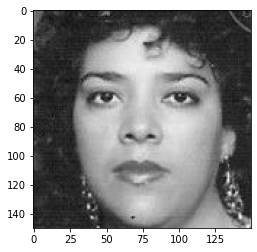

In [43]:
plt.imshow(imgarr)

In [44]:
resized = cv2.resize(imgarr, (100, 100))
topred = np.expand_dims(resized, axis=0)
topred.shape

(1, 100, 100, 3)

In [45]:
classes = ['man', 'woman']

In [47]:
model.predict(topred)[0]

1/1 [==============================] - 0s 25ms/step


array([0.99984646], dtype=float32)

In [53]:
pred = model.predict(topred)[0]
np.where(pred < 0.5, 'man', 'woman')[0]

1/1 [==============================] - 0s 24ms/step


'woman'

In [182]:
idx = np.argmax(model.predict(topred)[0])
label = classes[idx]    
label

1/1 [==============================] - 0s 21ms/step


'woman'

In [ ]:
def predict_img(dr):
    img = load_img(dr, target_size=IMAGE_SIZE)
    img_arr = img_to_array(img) / 255
    img_arr = np.expand_dims(img_arr, 0)
    pred = model.predict(img_arr)[0][0]
    output = 'dog' if pred >= 0.5 else 'cat'
    plt.imshow(img)
    plt.title(output)

In [ ]:
 np.argmax(conf)
           